In [1]:
import numpy as np
from PIL import Image
from scipy import linalg
import matplotlib.pyplot as plt

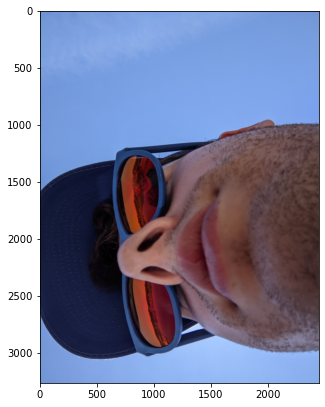

In [2]:
path = 'image.jpg'
img = Image.open(path)

fig, ax = plt.subplots(figsize=(5,12))
plt.imshow(img);

In [3]:
# Convert this image into an array
X = np.array(img)
np.shape(X)

(3264, 2448, 3)

In [4]:
# Divide this into RGB channels
X_r = X[:, :, 0]
X_g = X[:, :, 1]
X_b = X[:, :, 2]

# Use greyscale image by taking the mean over all channels
X_grayscale = X.mean(axis=2)
np.shape(X_grayscale)

(3264, 2448)

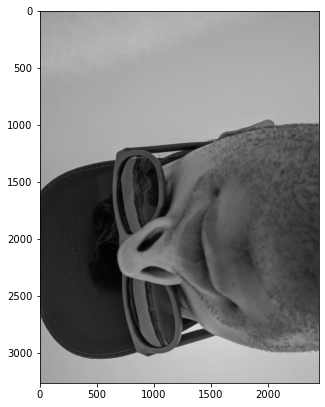

In [5]:
fig, ax = plt.subplots(figsize=(5,12))
plt.imshow(X_grayscale, cmap='gray')

Compute SVD and time it:

In [6]:
%%time
U, S, Vh = linalg.svd(X_grayscale)

CPU times: user 18.2 s, sys: 280 ms, total: 18.4 s
Wall time: 4.76 s


In [7]:
def low_rank_approximation(X, r, factors=None):
    """
    Computes the rank-r approximation of a matrix X.
    
    Parameters:
        X : np.ndarray
            Matrix to approximate.
        r : int
            Rank of matrix approximation.
        factors: list of np.ndarray
            If factors U, S, Vh are specified, these factors are used
            to avoid recomputing the 
    Returns:
        X_r : np.ndarray
            Rank-r approximation of X.
    """
    # Compute factors if not given
    if factors is None:
        U, S, Vh = linalg.svd(X)
    else:
        U, S, Vh = factors
    
    X_r = np.zeros_like(X)
    for i in range(r):
        X_r = X_r + S[i]*np.outer(U[:, i], Vh[i, :])
    return X_r

Text(0.5, 1.0, 'Rank 100 approximation')

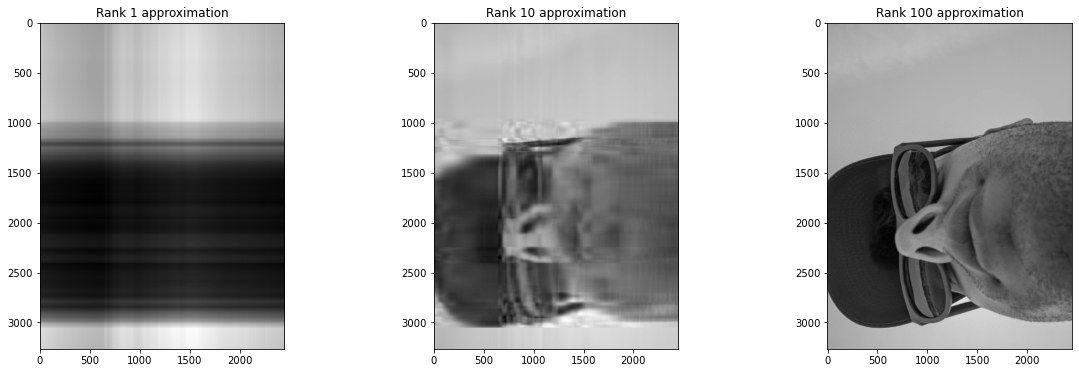

In [8]:
fig, axes = plt.subplots(ncols=3, figsize=(20,6))
axes[0].imshow(low_rank_approximation(X_grayscale, 1, factors=[U, S, Vh]), cmap='gray')
axes[1].imshow(low_rank_approximation(X_grayscale, 10, factors=[U, S, Vh]), cmap='gray')
axes[2].imshow(low_rank_approximation(X_grayscale, 100, factors=[U, S, Vh]), cmap='gray')

axes[0].set_title('Rank 1 approximation')
axes[1].set_title('Rank 10 approximation')
axes[2].set_title('Rank 100 approximation')

In [9]:
# Compute rank of original matrix
rank = np.sum(S > 1e-8)
rank

2448

In [10]:
linalg.svd?

Signature:
linalg.svd(
    a,
    full_matrices=True,
    compute_uv=True,
    overwrite_a=False,
    check_finite=True,
    lapack_driver='gesdd',
)
Docstring:
Singular Value Decomposition.

Factorizes the matrix `a` into two unitary matrices ``U`` and ``Vh``, and
a 1-D array ``s`` of singular values (real, non-negative) such that
``a == U @ S @ Vh``, where ``S`` is a suitably shaped matrix of zeros with
main diagonal ``s``.

Parameters
----------
a : (M, N) array_like
    Matrix to decompose.
full_matrices : bool, optional
    If True (default), `U` and `Vh` are of shape ``(M, M)``, ``(N, N)``.
    If False, the shapes are ``(M, K)`` and ``(K, N)``, where
    ``K = min(M, N)``.
compute_uv : bool, optional
    Whether to compute also ``U`` and ``Vh`` in addition to ``s``.
    Default is True.
overwrite_a : bool, optional
    Whether to overwrite `a`; may improve performance.
    Default is False.
check_finite : bool, optional
    Whether to check that the input matrix contains only fi